In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
base_vendas = pd.read_csv("Mall_Customers.csv")

In [3]:
base_vendas.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from pandas_profiling import ProfileReport

In [5]:
profile = ProfileReport(base_vendas, title = 'Report', html={'style':{'full_width':True}})
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


In [6]:
profile.to_file(output_file='kmeans.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 167.15it/s]


In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


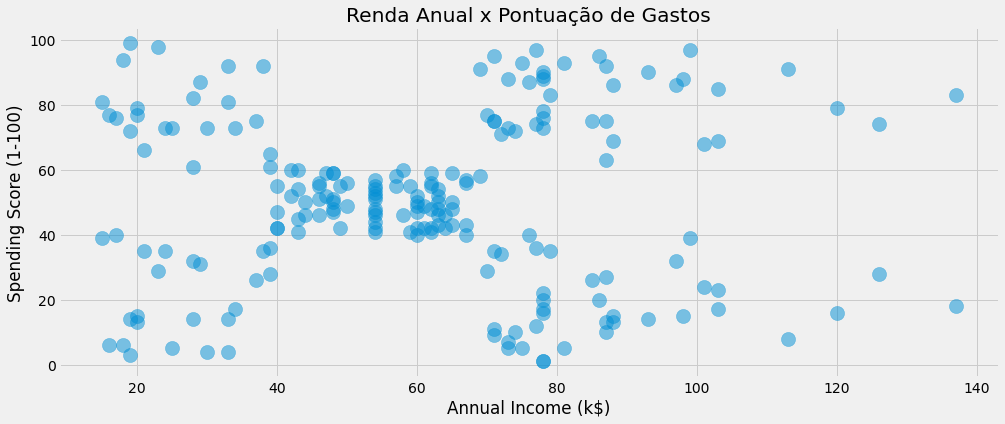

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=[15,6])
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=base_vendas, s=200, alpha=0.5)
plt.title('Renda Anual x Pontuação de Gastos')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

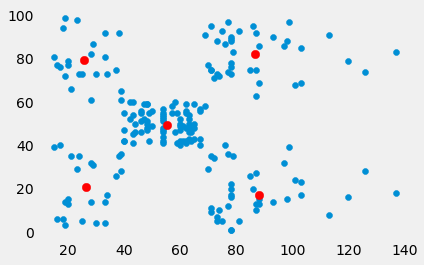

In [9]:
x2 = base_vendas[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=5, init='k-means++',max_iter=300,n_init=10)
pred_y = kmeans.fit_predict(x2)

km = kmeans.cluster_centers_

plt.scatter(x2[:,0], x2[:,1])
plt.grid()
plt.scatter(km[:,0], km[:,1], s=70, c='red')
plt.show()

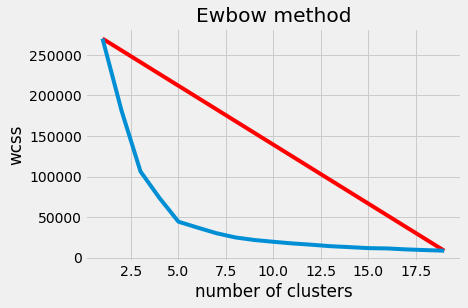

In [10]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10)
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.plot([1,19], [wcss[0],wcss[len(wcss)-1]], c='red')
plt.plot(range(1,20),wcss)
plt.title('Ewbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]
44448.45544793369


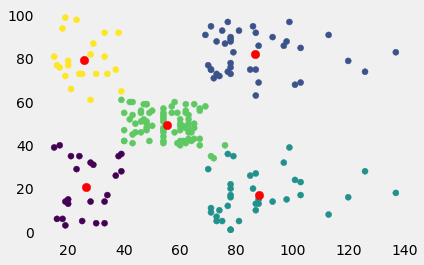

In [11]:
x2 = base_vendas[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=5, init='k-means++',max_iter=300,n_init=10)
pred_y = kmeans.fit_predict(x2)

km = kmeans.cluster_centers_

print(km)
print(kmeans.inertia_)

plt.scatter(x2[:,0], x2[:,1], c=pred_y)
plt.grid()
plt.scatter(km[:,0], km[:,1], s=70, c='red')
plt.show()

In [12]:
base_vendas['Group'] = pd.Series(pred_y, index=base_vendas.index)
base_vendas.to_csv('base_vendas_agrupado.csv')
base_vendas

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [13]:
grupos = base_vendas.Group.unique()
grupos.sort()
grupos

array([0, 1, 2, 3, 4])

In [14]:
newdf = []
profiles = []
for i in grupos:
    newdf.append(base_vendas[base_vendas.Group == i])
    profiles.append(ProfileReport(newdf[i], title = 'Report', html={'style':{'full_width':True}}))
    profiles[i].to_file(output_file='kmeans'+str(i)+'.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 166.88it/s]


In [28]:
for i in grupos:
    print('Grupo ' + str(i) + ": ")
    income_score_relation = np.mean(newdf[i]['Annual Income (k$)']/newdf[i]['Spending Score (1-100)'])
    mean_age = np.mean(newdf[i]['Age'])
    x = newdf[i].Gender == 'Female'
    y = newdf[i].Gender == 'Male'
    dominant_gender = 'Female' if sum(x)>sum(y) else 'Male'  
    keys = ['income_score_relation', 'mean_age', 'dominant_gender']
    values = [income_score_relation, mean_age, dominant_gender]
    dicts = zip(keys,values)
    dictionary[i] = dict(dicts)
    print(dictionary[i])

Grupo 0: 
{'income_score_relation': 2.30521648959285, 'mean_age': 45.21739130434783, 'dominant_gender': 'Female'}
Grupo 1: 
{'income_score_relation': 1.068307903236472, 'mean_age': 32.69230769230769, 'dominant_gender': 'Female'}
Grupo 2: 
{'income_score_relation': 10.575836460155893, 'mean_age': 41.114285714285714, 'dominant_gender': 'Male'}
Grupo 3: 
{'income_score_relation': 1.1444593172918587, 'mean_age': 42.71604938271605, 'dominant_gender': 'Female'}
Grupo 4: 
{'income_score_relation': 0.33108989893245994, 'mean_age': 25.272727272727273, 'dominant_gender': 'Female'}
